In [12]:
import os
import glob
import pandas as pd 
import numpy as np
#import plotnine as p9
import matplotlib.pyplot as plt
import seaborn as sns
try :
    import nibabel as nib
except : 
    !pip install nibabel
    import nibabel as nib

from skimage.util import montage 
from skimage.transform import rotate
try : 
    import openxyl
except : 
    ! pip install openpyxl
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline
#%matplotlib notebook
import laBIBILaRORO as lbr
from importlib import reload



In [13]:
STUDY_PATH=os.path.join("/NAS","dumbo","protocoles","FAIRPARKII")
SCRIPT_PATH=os.path.join(STUDY_PATH,'scripts')
LOG_PATH=os.path.join(SCRIPT_PATH,'log')
#CQ_FILE=os.path.join(STUDY_PATH,'FairparkII_MRIData_20210622.xlsx')
CQ_FILE=os.path.join(STUDY_PATH,'FairparkII_MRIData_20210817.xlsx')

In [14]:
RES_FILE=os.path.join(STUDY_PATH,"resT2Struct.csv")
val = pd.read_csv(RES_FILE,index_col=0)
RES_FILE=os.path.join(STUDY_PATH,"resT2Struct_W00.csv")
val_W00 = pd.read_csv(RES_FILE,index_col=0)
RES_FILE=os.path.join(STUDY_PATH,"resT2Struct_W36.csv")
val_W36 = pd.read_csv(RES_FILE,index_col=0)

538 ROI (360 Glasser+ Keuken + )
A priori Selection de 54 region 

In [15]:
df_roi = pd.read_csv(os.path.join(STUDY_PATH,'Coord_ROI_atlas_inMNI.csv'))
#df_roi = df_roi.drop('Name_inFP2', axis=1)
df_roi.set_index('Name_inFP2', inplace=True)
df_roi[df_roi['RoroChoice']==1].iloc[:,0:3]

X          Y          Z
Name_inFP2                                                              
Right accumbens                           9.388525  12.688525  -7.250820
Left accumbens                           -9.303387  11.960236  -7.449190
Left amygdala                            22.286025  -4.068067 -19.733526
Right amygdala                          -21.742625  -5.337021 -19.808260
Right caudate                            13.781250  10.302004   9.587786
Left caudate                            -12.909930   9.549651   9.286178
Right hippocampus                        26.481760 -21.424464 -13.697425
Left hippocampus                        -24.975064 -22.901548 -13.741617
Right pallidum                           20.209500  -2.362500  -2.030000
Left pallidum                           -19.372294  -3.380471  -2.081289
Right putamen                            25.881330   2.194801   0.054018
Left putamen                            -25.193927   0.724375   0.188727
Right thalamus                           11.860559 -17.959282   5.417171
Left thalamus                           -11.206180 -19.134177   5.353869
Right anterior insula                    36.822819  11.966779  -2.324497
Left anterior insula                    -35.389674  10.764575  -2.156791
Right cuneus                              9.472509 -78.154629  24.550813
Left cuneus                              -5.953444 -81.449862  21.351928
Right postcentral gyrus medial segment    8.473389 -40.042017  63.904762
Left postcentral gyrus medial segment    -8.169266 -41.949162  63.485269
Right precentral gyrus medial segment     6.456253 -25.169005  55.441601
Left precentral gyrus medial segment     -6.045762 -26.120175  55.012933
Right sup. frontal gyrus medial segment   5.868920  46.075108  22.130681
Left sup. frontal gyrus medial segment   -4.631939  44.327950  28.258637
Right posterior cingulate gyrus           7.442642 -41.674137  24.222648
Left posterior cingulate gyrus           -6.217737 -42.333912  24.767506
Right precuneus                           9.269851 -58.945146  39.622091
Left precuneus                           -7.466016 -60.541963  37.911022
Right parahippocampal gyrus              23.522534 -20.554582 -23.726340
Left parahippocampal gyrus              -21.759709 -22.832841 -22.770838
Right posterior insula                   39.120089  -9.706325   2.046810
Left posterior insula                   -38.164329 -11.889329   2.025915
Right postcentral gyrus                  40.993143 -23.463374  52.103757
Left postcentral gyrus                  -39.767292 -27.158630  52.312786
Right precentral gyrus                   40.773023  -6.440686  46.997745
Left precentral gyrus                   -39.165601  -8.622654  47.792741
Right supplementary motor cortex          5.645116   5.262797  52.685507
Left supplementary motor cortex          -4.787291   5.015644  51.597017
Right supramarginal gyrus                56.871672 -33.389069  37.162347
Left supramarginal gyrus                -55.315523 -38.468746  37.154955
Left_Dentate                            -14.415076 -59.396965 -35.052863
Right_Dentate                            16.438810 -59.408094 -35.022428
Right RN                                  5.530688 -20.024462  -8.203447
Left Gpi                                -17.831379  -8.206164  -2.709391
Left Gpe                                -19.206820  -4.747612   0.032922
Right STR                                19.239049   4.845743   4.477829
Right Gpi                                18.506173  -7.059579  -2.530452
Right SN                                 10.426786 -16.793945 -11.652783
Left RN                                  -4.321009 -20.294465  -8.120523
Left SN                                  -9.360342 -17.024617 -11.796926
Right Sth                                10.820730 -13.124564  -6.198184
Left Sth                                -10.127392 -14.313306  -6.263174
Right Gpe                                19.790497  -3.364154   0.096141
Left STR                          

In [16]:
CQData = pd.read_excel(CQ_FILE,index_col=0,engine='openpyxl')
df_W00=CQData.query("SUBJ.str.endswith('W00')")
df_W00.index=df_W00.index.str[:-8]
df_W36=CQData.query("SUBJ.str.endswith('W36')")
df_W36.index=df_W36.index.str[:-8]
df_CQ_FULL = pd.concat([df_W00.add_suffix('_W00'), df_W36.add_suffix('_W36')], axis=1)

In [17]:
df_CQ_FULL["GROUP"] = pd.NaT
GROUP_FILE=os.path.join(STUDY_PATH,"Group_FAIRPARK_CORR.xlsx")
GroupData = pd.read_excel(GROUP_FILE,index_col=0,engine='openpyxl')
GroupData.index=GroupData.index.astype(str)
for SUBJ in df_CQ_FULL.index:
    ptID=SUBJ[0]+SUBJ[2:6]   
    GRP=""
    if ptID in GroupData.index :
        if not np.isnan(GroupData['GROUPE_1_Deferiprone'][ptID]) :           
            df_CQ_FULL['GROUP'][SUBJ]=GroupData['GROUPE_1_Deferiprone'][ptID]
                
print(df_CQ_FULL)

          QC_3DT1_W00  QC_3DMULTI_W00  RV_CQ_ORIENTATION_W00  QC_3DT1_W36  \
SUBJ                                                                        
101001YM          3.0             4.0                    NaN          4.0   
101002GX          3.0             0.0                    NaN          3.0   
101003DM          4.0             4.0                    NaN          4.0   
101004NW          4.0             4.0                    NaN          4.0   
101005CT          4.0             4.0                    NaN          4.0   
...               ...             ...                    ...          ...   
703011AA          4.0             4.0                    NaN          4.0   
703012AA          4.0             4.0                    NaN         -1.0   
703013AA          4.0             4.0                    NaN          4.0   
101011VC          NaN             NaN                    NaN          4.0   
104003MA          NaN             NaN                    NaN          3.0   

/tmp/ipykernel_998876/1183194703.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CQ_FULL['GROUP'][SUBJ]=GroupData['GROUPE_1_Deferiprone'][ptID]
/tmp/ipykernel_998876/1183194703.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df_CQ_FULL['GROUP'][SUBJ]=GroupData['GROUPE_1_Deferiprone'][ptID]


In [18]:
FULL_FULL=pd.read_csv(os.path.join(STUDY_PATH,"R2FULL_538_sscort_cort.csv"),index_col=[0])
FULL_FULL

SUBJ_ID  SES  3rd ventricle  4th ventricle  Right accumbens  \
0    101001YM  W00      18.171204      18.828230        26.414602   
1    101001YM  W36      18.649381      18.914041        25.469854   
2    101005CT  W00      18.974044      18.409018        27.445627   
3    101005CT  W36      18.710068      20.933644        25.678870   
4    101008NB  W00      18.591234      20.483508        24.346545   
..        ...  ...            ...            ...              ...   
291  503012EC  W36      18.511313      21.219409        23.918615   
292  703009AA  W00      18.740080      18.726829        25.589587   
293  703009AA  W36      18.245477      18.776924        25.380437   
294  703011AA  W00      17.809249      18.509275        27.412112   
295  703011AA  W36      19.256055      17.327501        27.451440   

     Left accumbens  Left amygdala  Right amygdala  Brainstem  Right caudate  \
0         27.097172      23.951045       23.832521  26.115995      26.849996   
1         25.323428      22.911024       22.951904  26.707482      27.215085   
2         27.286074      23.814728       23.245600  26.279194      28.890469   
3         27.143327      24.090600       23.668992  27.141539      29.967811   
4         25.499176      23.469186       23.130174  26.936304      26.748239   
..              ...            ...             ...        ...            ...   
291       24.310970      24.349252       22.324395  25.767137      27.729775   
292       27.873868      23.531021       23.677597  25.455466      26.538843   
293       25.645862      22.456266       23.018140  26.792440      27.070482   
294       25.748203      24.514627       20.770224  25.974884      30.388777   
295       25.266286      23.162449       23.181948  25.732459      29.579517   

     ...     R_p47r      R_TGv    R_MBelt    R_LBelt       R_A4    R_STSva  \
0    ...  26.626270  31.849415  25.557194  26.169202  27.940591  27.698209   
1    ...  27.046985  28.856076  25.578670  26.078443  28.398998  27.144139   
2    ...  25.230109  26.557649  26.648734  26.530872  26.684156  26.599118   
3    ...  24.843452  27.261529  26.660341  25.962560  26.616257  27.252678   
4    ...  25.686522  25.927017  24.330171  24.764357  25.731800  26.586775   
..   ...        ...        ...        ...        ...        ...        ...   
291  ...  27.847545  25.509110  22.119526  23.605098  25.930242  27.315340   
292  ...  24.851356  27.449065  25.218059  26.066517  26.401845  24.639483   
293  ...  24.785988  26.373333  24.656570  25.310952  25.039738  24.647719   
294  ...  26.679758  24.036135  24.884262  25.017498  25.521362  26.507270   
295  ...  38.165423  26.354022  24.690730  25.236979  25.120764  26.665183   

        R_TE1m       R_PI    R_a32pr      R_p24  
0    47.216043  25.816787  24.176985  23.347059  
1    32.006251  25.402370  24.559420  24.065620  
2    28.574244  25.840119  24.134886  23.940023  
3    28.239508  25.742248  25.296505  23.324243  
4    25.677945  24.730406  24.406487  23.282754  
..         ...        ...        ...        ...  
291  27.289737  24.069070  23.940012  22.999763  
292  25.875495  24.636055  26.595669  23.516717  
293  24.677358  25.341862  25.854246  23.420424  
294  25.269378  24.118133  23.989694  22.503244  
295  26.325580  25.457365  24.083231  23.184606  

[296 rows x 540 columns]

In [19]:
liste_DEF=[SUBJ for SUBJ in set(FULL_FULL["SUBJ_ID"]) if SUBJ in df_CQ_FULL[df_CQ_FULL['GROUP']==1].index ]
liste_PLA=[SUBJ for SUBJ in set(FULL_FULL["SUBJ_ID"]) if SUBJ in df_CQ_FULL[df_CQ_FULL['GROUP']==2].index ]
print(len(liste_DEF),np.sort(liste_DEF))
print(len(liste_PLA),np.sort(liste_PLA))

70 ['101003DM' '101004NW' '101006BG' '101007DG' '101013FB' '101017IR'
 '101019HB' '101028MM' '101030LG' '101031WA' '101032DA' '101039KC'
 '101041BA' '101044WJ' '101045MC' '101048TC' '101051DC' '101058TN'
 '102004JM' '102007PL' '102008LB' '102012JB' '102014JL' '102015FL'
 '102018NG' '103001MF' '103002JW' '103008OS' '103010CA' '103013JG'
 '103019HS' '103023AH' '103025MP' '103027RF' '103032MS' '104013YD'
 '104017JO' '104019DB' '104020DL' '105008FB' '105012LB' '105013SV'
 '105018YL' '105021RB' '105022BC' '106001HB' '106003YT' '106008EH'
 '106010AG' '106012PP' '106013BB' '106015HS' '106018BB' '106021IC'
 '108003JM' '108004DC' '108008MS' '108012GD' '108017FM' '201005AA'
 '201007AA' '201017AA' '301005HO' '301008DP' '301010OK' '503007MK'
 '503008PP' '503012EC' '703009AA' '703011AA']
78 ['101001YM' '101005CT' '101008NB' '101012DE' '101016DC' '101018JW'
 '101024EL' '101026DD' '101029VD' '101033SM' '101034DF' '101035BD'
 '101037FN' '101047LW' '101049CD' '101052AF' '101057GT' '102002XD'
 '102009AR

In [20]:
FULL_FULL=FULL_FULL[(FULL_FULL['SUBJ_ID']!="103019HS").values]
FULL_FULL=FULL_FULL[(FULL_FULL['SUBJ_ID']!="105009AM").values]

In [21]:
PLA_W00=FULL_FULL[(FULL_FULL['SES']=="W00").values &  [NAME in liste_PLA for NAME in FULL_FULL['SUBJ_ID']]].iloc[:,2:]
PLA_W36=FULL_FULL[(FULL_FULL['SES']=="W36").values &  [NAME in liste_PLA for NAME in FULL_FULL['SUBJ_ID']]].iloc[:,2:]
DEF_W00=FULL_FULL[(FULL_FULL['SES']=="W00").values &  [NAME in liste_DEF for NAME in FULL_FULL['SUBJ_ID']]].iloc[:,2:]
DEF_W36=FULL_FULL[(FULL_FULL['SES']=="W36").values &  [NAME in liste_DEF for NAME in FULL_FULL['SUBJ_ID']]].iloc[:,2:]

#PLA_W00.select_dtypes(exclude=[np.number]).columns
PLA_W00['Vermis_CrusI'] = PLA_W00['Vermis_CrusI'].astype(float)
PLA_W36['Vermis_CrusI'] = PLA_W36['Vermis_CrusI'].astype(float)
DEF_W00['Vermis_CrusI'] = DEF_W00['Vermis_CrusI'].astype(float)
DEF_W36['Vermis_CrusI'] = DEF_W36['Vermis_CrusI'].astype(float)

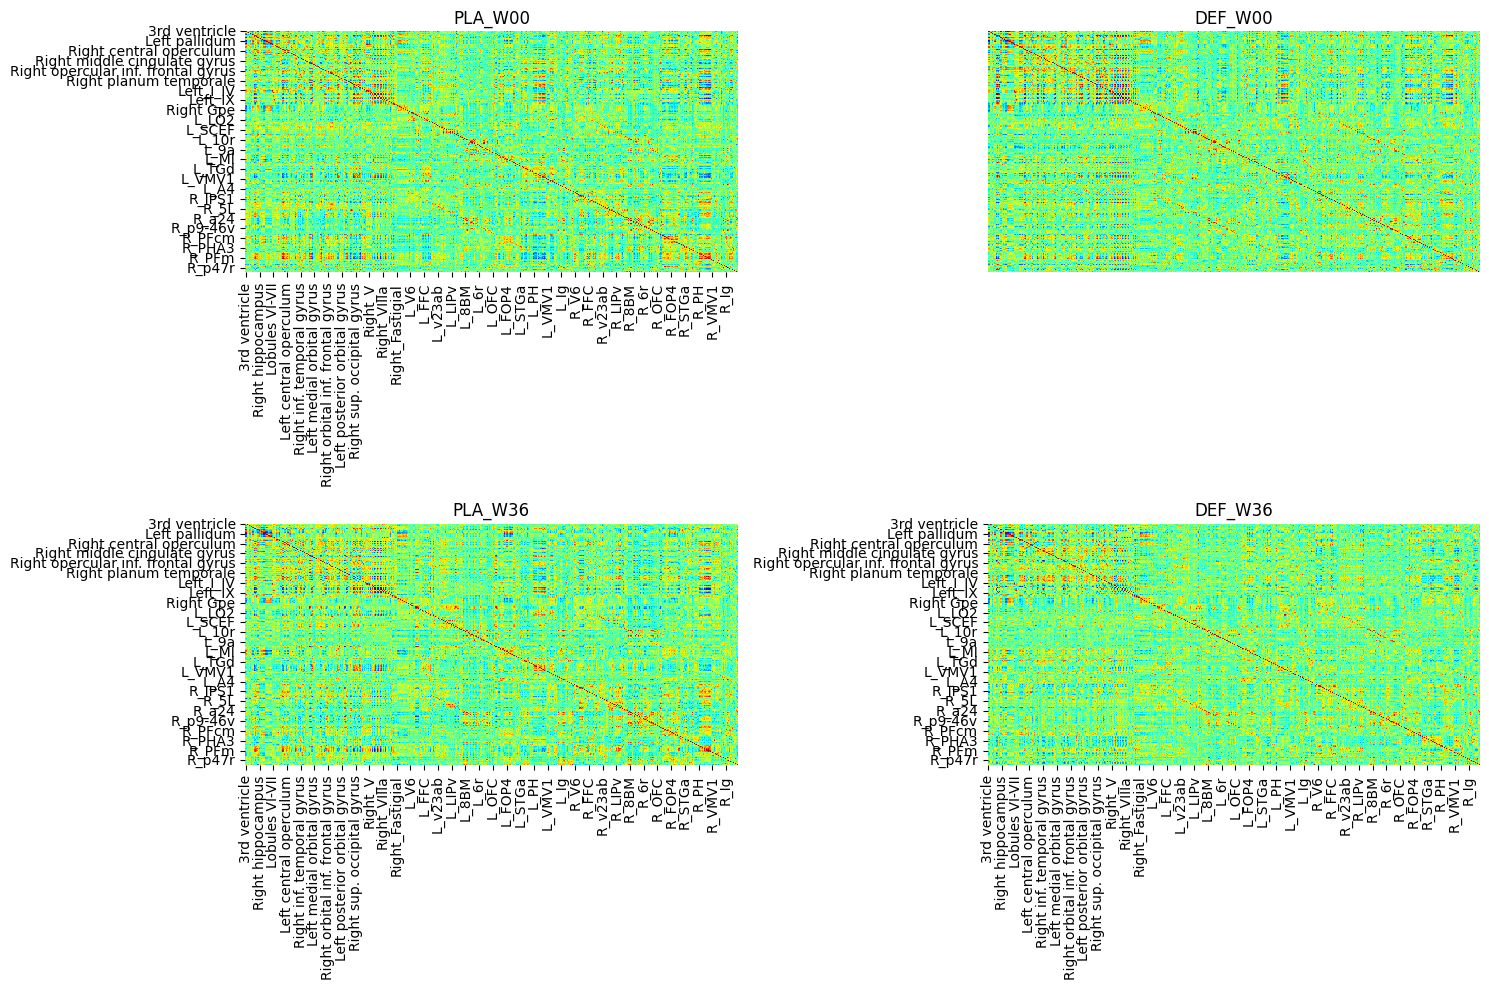

In [48]:
from scipy.stats import zscore

# Appliquer le Z-score sur les lignes des DataFrames
PLA_W00_zscore = PLA_W00.apply(zscore, axis=1)
DEF_W00_zscore = DEF_W00.apply(zscore, axis=1)
PLA_W36_zscore = PLA_W36.apply(zscore, axis=1)
DEF_W36_zscore = DEF_W36.apply(zscore, axis=1)

# Créer une figure et des sous-graphiques
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Heatmap pour DEF_W00
sns.heatmap(DEF_W00_zscore.corr(), vmin=-1, vmax=1, cbar_kws={'shrink': 0.5}, ax=axes[0, 1],cmap='jet',cbar=False)
axes[0, 1].set_title('DEF_W00')
#axes[0, 1].set_xticks([])
#axes[0, 1].set_yticks([])

# Heatmap pour PLA_W00
sns.heatmap(PLA_W00_zscore.corr(), vmin=-1, vmax=1, cbar_kws={'shrink': 0.5}, ax=axes[0, 0],cmap='jet',cbar=False)
axes[0, 0].set_title('PLA_W00')
#axes[0, 1].set_xticks([])
#axes[0, 1].set_yticks([])

# Heatmap pour PLA_W36
sns.heatmap(PLA_W36_zscore.corr(), vmin=-1, vmax=1, cbar_kws={'shrink': 0.5}, ax=axes[1, 0],cmap='jet',cbar=False)
axes[1, 0].set_title('PLA_W36')
#axes[0, 1].set_xticks([])
#axes[0, 1].set_yticks([])

# Heatmap pour DEF_W36
sns.heatmap(DEF_W36_zscore.corr(), vmin=-1, vmax=1, cbar_kws={'shrink': 0.5}, ax=axes[1, 1],cmap='jet',cbar=False)
axes[1, 1].set_title('DEF_W36')
#axes[0, 1].set_xticks([])
#axes[0, 1].set_yticks([])

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()

(array([   36.,    92.,   212.,   500.,  1028.,  1862.,  3360.,  5816.,
        10492., 17232., 25172., 31992., 35860., 34686., 30020., 24174.,
        18574., 13878.,  9952.,  7278.,  5404.,  3952.,  2678.,  1846.,
         1242.,   780.,   458.,   212.,    96.,   560.]),
 array([-0.81048558, -0.75013606, -0.68978654, -0.62943702, -0.5690875 ,
        -0.50873798, -0.44838846, -0.38803894, -0.32768942, -0.2673399 ,
        -0.20699038, -0.14664086, -0.08629135, -0.02594183,  0.03440769,
         0.09475721,  0.15510673,  0.21545625,  0.27580577,  0.33615529,
         0.39650481,  0.45685433,  0.51720385,  0.57755337,  0.63790288,
         0.6982524 ,  0.75860192,  0.81895144,  0.87930096,  0.93965048,
         1.        ]),
 <BarContainer object of 30 artists>)

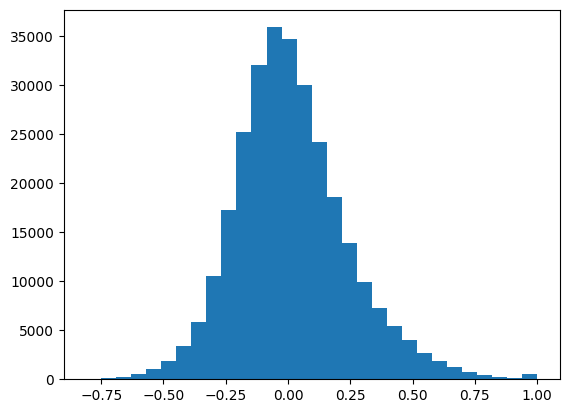

In [32]:
plt.hist(np.ravel(PLA_W00.apply(zscore, axis=1).corr()),30)

La bibil à RORO loaded
6 found
ROI for community 0 are : Index(['3rd ventricle', '4th ventricle', 'Left amygdala', 'Right amygdala',
       'Brainstem', 'Right caudate', 'Left caudate', 'Right hippocampus',
       'Left hippocampus', 'Right inf. lateral ventricle',
       'Left inf. lateral ventricle', 'Right lateral ventricle',
       'Left lateral ventricle', 'Right pallidum', 'Left pallidum',
       'Right putamen', 'Left putamen', 'Right ventral DC', 'Left ventral DC',
       'Lobules I-V', 'Lobules VI-VII', 'Lobules VIII-X',
       'Left basal forebrain', 'Right basal forebrain',
       'Right anterior cingulate gyrus', 'Left anterior cingulate gyrus',
       'Right anterior insula', 'Left anterior insula',
       'Left central operculum', 'Right entorhinal area',
       'Right frontal operculum', 'Left frontal operculum',
       'Right frontal pole', 'Left frontal pole',
       'Right middle cingulate gyrus', 'Left middle cingulate gyrus',
       'Left sup. frontal gyrus medial s

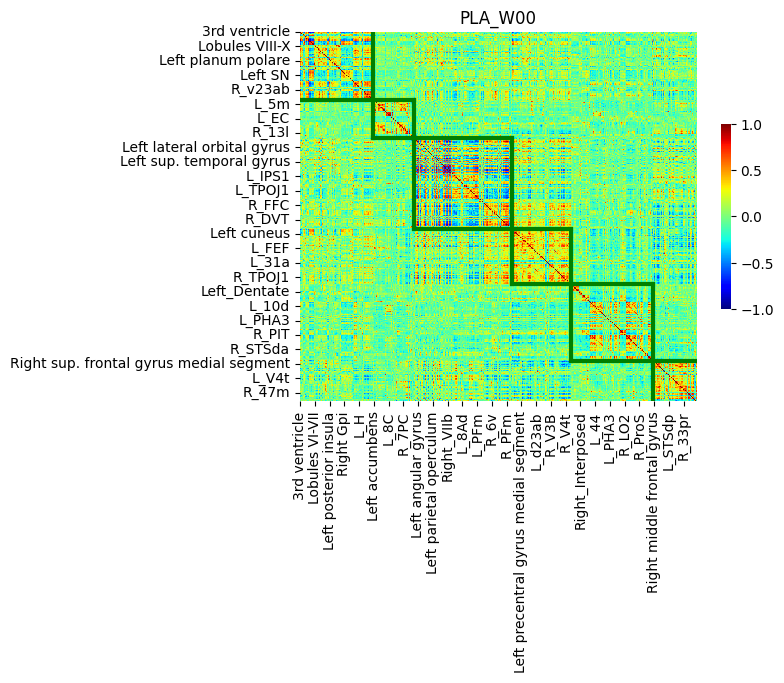

4 found
ROI for community 0 are : Index(['3rd ventricle', '4th ventricle', 'Right accumbens', 'Left accumbens',
       'Left amygdala', 'Right amygdala', 'Brainstem', 'Right caudate',
       'Left caudate', 'Right cerebral White Matter',
       ...
       'R_FST', 'R_31a', 'R_pOFC', 'R_PoI1', 'R_Ig', 'R_LBelt', 'R_TE1m',
       'R_PI', 'R_a32pr', 'R_p24'],
      dtype='object', length=196)
ROI for community 1 are : Index(['Right cerebellum exterior', 'Left cerebellum exterior',
       'Right cerebellum White Matter', 'Left cerebellum White Matter',
       'Right hippocampus', 'Right angular gyrus', 'Left angular gyrus',
       'Right central operculum', 'Right entorhinal area',
       'Right fusiform gyrus',
       ...
       'R_PGi', 'R_VMV3', 'R_PHA2', 'R_VMV2', 'R_VVC', 'R_p47r', 'R_TGv',
       'R_MBelt', 'R_A4', 'R_STSva'],
      dtype='object', length=152)
ROI for community 2 are : Index(['Right calcarine cortex', 'Left calcarine cortex', 'Right cuneus',
       'Left inf. occipit

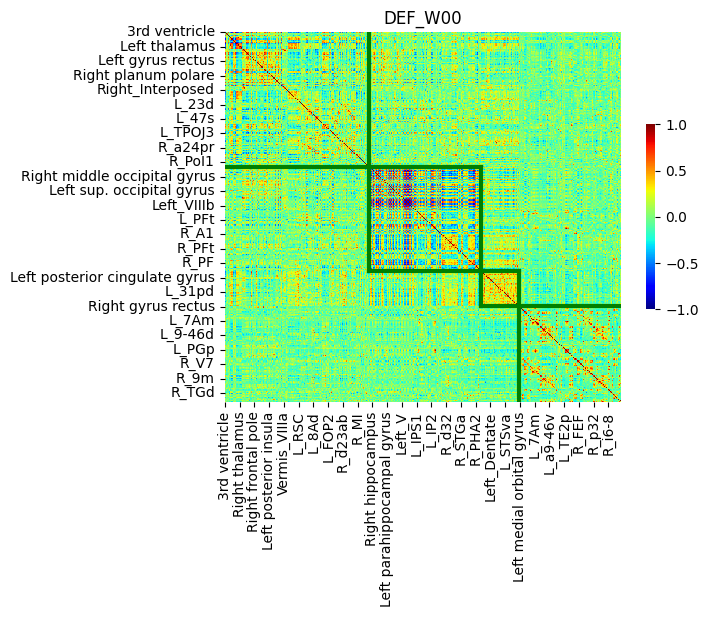

5 found
ROI for community 0 are : Index(['3rd ventricle', '4th ventricle', 'Right accumbens', 'Left accumbens',
       'Right caudate', 'Left caudate', 'Right cerebral White Matter',
       'Left cerebral White Matter', 'Right inf. lateral ventricle',
       'Right lateral ventricle', 'Left lateral ventricle', 'Right pallidum',
       'Left pallidum', 'Right putamen', 'Left putamen', 'Right thalamus',
       'Left thalamus', 'Right ventral DC', 'Left ventral DC',
       'Right anterior cingulate gyrus', 'Left anterior cingulate gyrus',
       'Right anterior insula', 'Left anterior insula',
       'Right calcarine cortex', 'Left calcarine cortex', 'Right cuneus',
       'Left cuneus', 'Left entorhinal area', 'Right frontal pole',
       'Left frontal pole', 'Right lingual gyrus',
       'Right middle cingulate gyrus', 'Left middle cingulate gyrus',
       'Right medial frontal cortex', 'Left medial frontal cortex',
       'Right middle frontal gyrus', 'Left middle frontal gyrus',
     

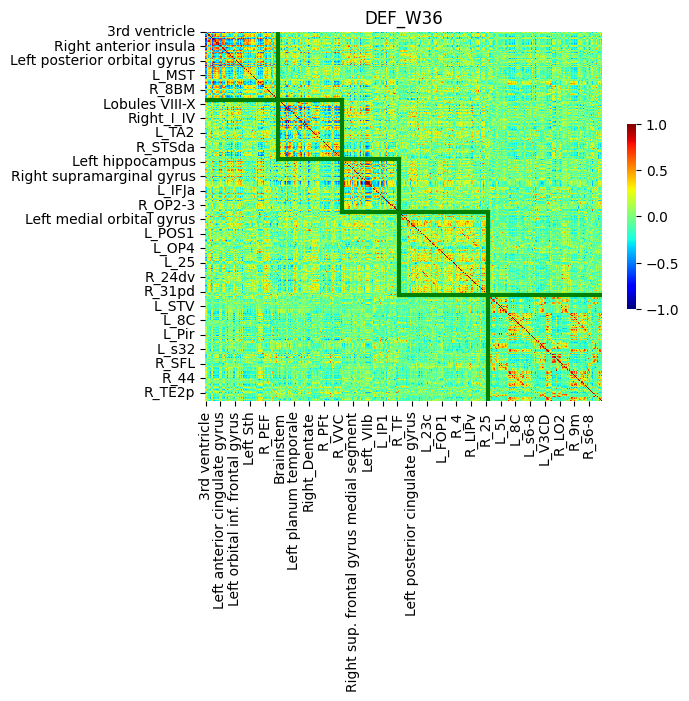

6 found
ROI for community 0 are : Index(['3rd ventricle', '4th ventricle', 'Left amygdala', 'Right amygdala',
       'Right caudate', 'Left caudate', 'Right hippocampus',
       'Left hippocampus', 'Right inf. lateral ventricle',
       'Left inf. lateral ventricle', 'Right lateral ventricle',
       'Left lateral ventricle', 'Right pallidum', 'Left pallidum',
       'Right putamen', 'Left putamen', 'Right thalamus', 'Left thalamus',
       'Right ventral DC', 'Left ventral DC', 'Lobules I-V',
       'Left basal forebrain', 'Right basal forebrain',
       'Right anterior cingulate gyrus', 'Left anterior cingulate gyrus',
       'Right anterior insula', 'Left anterior insula',
       'Left central operculum', 'Left cuneus', 'Right entorhinal area',
       'Left entorhinal area', 'Left frontal operculum',
       'Right middle cingulate gyrus', 'Left middle cingulate gyrus',
       'Right medial frontal cortex',
       'Right sup. frontal gyrus medial segment',
       'Left sup. frontal g

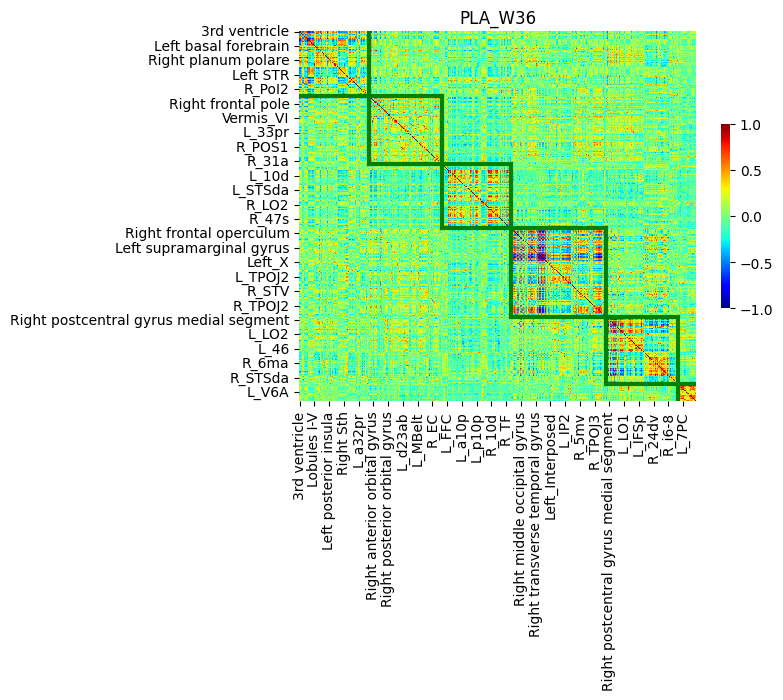

In [39]:
reload(lbr)
for str_nam,nd in zip(["PLA_W00","DEF_W00","DEF_W36","PLA_W36"],[PLA_W00,DEF_W00,DEF_W36,PLA_W36]):
    nd_zscore = nd.apply(zscore, axis=1)
    lbr.get_communities(nd_zscore.corr(),df_roi.iloc[:,:3],str_nam,os.path.join(STUDY_PATH,"screenshots"))

7 found
ROI for community 0 are : Index(['Right accumbens', 'Left accumbens', 'Right caudate', 'Left caudate',
       'Right putamen', 'Left putamen', 'Left parahippocampal gyrus'],
      dtype='object')
ROI for community 1 are : Index(['Left amygdala', 'Right hippocampus', 'Right parahippocampal gyrus',
       'Left postcentral gyrus', 'Left precentral gyrus',
       'Right supramarginal gyrus', 'Left supramarginal gyrus',
       'Right_Dentate'],
      dtype='object')
ROI for community 2 are : Index(['Right amygdala'], dtype='object')
ROI for community 3 are : Index(['Left hippocampus', 'Right thalamus', 'Left thalamus',
       'Right anterior insula', 'Left anterior insula', 'Right cuneus',
       'Left cuneus', 'Right posterior insula', 'Left posterior insula'],
      dtype='object')
ROI for community 4 are : Index(['Right pallidum', 'Left pallidum', 'Right RN', 'Left Gpi', 'Left Gpe',
       'Right STR', 'Right Gpi', 'Right SN', 'Left RN', 'Left SN', 'Right Sth',
       'Left Sth'

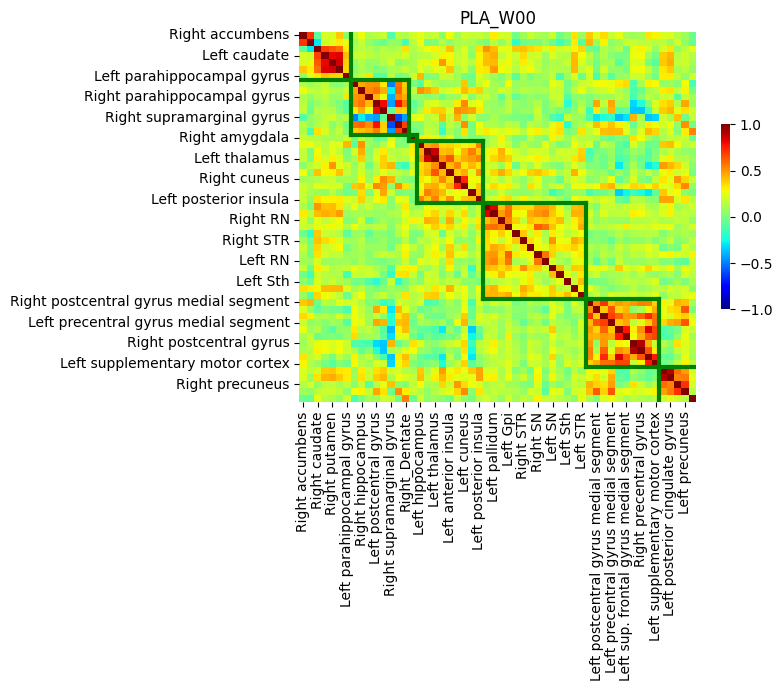

5 found
ROI for community 0 are : Index(['Right accumbens', 'Left accumbens'], dtype='object')
ROI for community 1 are : Index(['Left amygdala', 'Right hippocampus', 'Right parahippocampal gyrus',
       'Left postcentral gyrus', 'Right supramarginal gyrus',
       'Left supramarginal gyrus', 'Right_Dentate'],
      dtype='object')
ROI for community 2 are : Index(['Right amygdala', 'Right thalamus', 'Left thalamus',
       'Right anterior insula', 'Right cuneus', 'Left cuneus',
       'Right postcentral gyrus medial segment',
       'Left postcentral gyrus medial segment',
       'Right precentral gyrus medial segment',
       'Left precentral gyrus medial segment',
       'Right sup. frontal gyrus medial segment',
       'Left sup. frontal gyrus medial segment', 'Right precuneus',
       'Left precuneus', 'Right posterior insula', 'Right postcentral gyrus',
       'Right precentral gyrus', 'Left precentral gyrus',
       'Right supplementary motor cortex', 'Left supplementary motor co

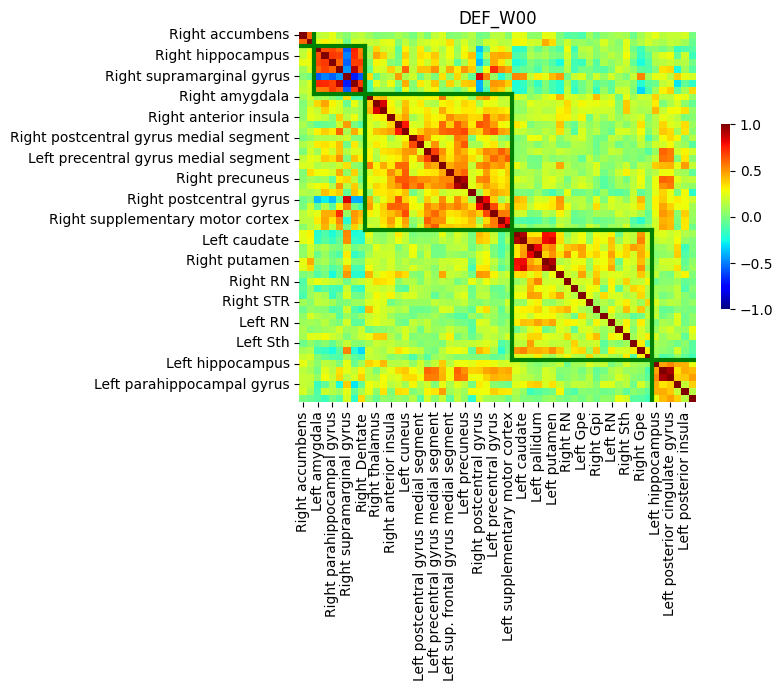

5 found
ROI for community 0 are : Index(['Right accumbens', 'Left accumbens', 'Right caudate', 'Left caudate',
       'Right putamen', 'Left putamen', 'Left thalamus'],
      dtype='object')
ROI for community 1 are : Index(['Left amygdala', 'Right hippocampus', 'Right thalamus',
       'Right anterior insula', 'Right parahippocampal gyrus',
       'Right posterior insula', 'Right supramarginal gyrus',
       'Left supramarginal gyrus', 'Right_Dentate'],
      dtype='object')
ROI for community 2 are : Index(['Right amygdala', 'Left hippocampus', 'Left parahippocampal gyrus',
       'Left posterior insula', 'Left RN', 'Left STR'],
      dtype='object')
ROI for community 3 are : Index(['Right pallidum', 'Left pallidum', 'Left_Dentate', 'Right RN',
       'Left Gpi', 'Left Gpe', 'Right STR', 'Right Gpi', 'Right SN', 'Left SN',
       'Right Sth', 'Left Sth', 'Right Gpe'],
      dtype='object')
ROI for community 4 are : Index(['Left anterior insula', 'Right cuneus', 'Left cuneus',
       'R

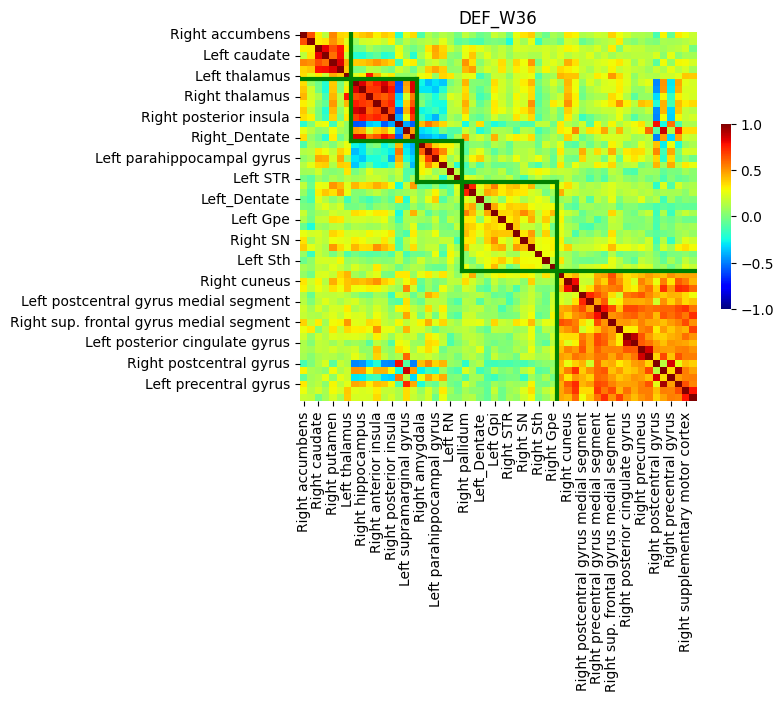

6 found
ROI for community 0 are : Index(['Right accumbens', 'Left accumbens', 'Right caudate', 'Left caudate',
       'Right putamen', 'Left putamen'],
      dtype='object')
ROI for community 1 are : Index(['Left amygdala', 'Right hippocampus', 'Left thalamus',
       'Left anterior insula', 'Right cuneus', 'Left cuneus',
       'Left postcentral gyrus medial segment',
       'Left precentral gyrus medial segment',
       'Left sup. frontal gyrus medial segment',
       'Left posterior cingulate gyrus', 'Left precuneus',
       'Right parahippocampal gyrus', 'Right posterior insula',
       'Left posterior insula', 'Left postcentral gyrus',
       'Left precentral gyrus', 'Left supplementary motor cortex',
       'Left supramarginal gyrus'],
      dtype='object')
ROI for community 2 are : Index(['Right amygdala', 'Left hippocampus', 'Right anterior insula',
       'Right postcentral gyrus medial segment',
       'Right precentral gyrus medial segment',
       'Right sup. frontal gyrus 

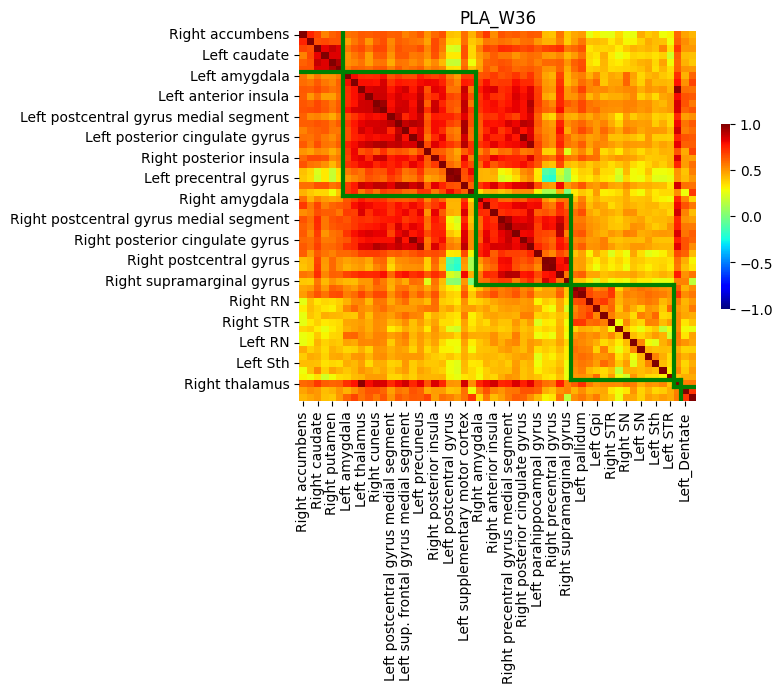

In [40]:
col2keep=df_roi['RoroChoice']==1
for str_nam,nd in zip(["PLA_W00","DEF_W00","DEF_W36","PLA_W36"],[PLA_W00.loc[:,col2keep],DEF_W00.loc[:,col2keep],DEF_W36.loc[:,col2keep],PLA_W36.loc[:,col2keep]]):
    lbr.get_communities(nd.corr(),df_roi[col2keep].iloc[:,:3],str_nam,os.path.join(STUDY_PATH,"screenshots"))

La bibil à RORO loaded
Euclidean distance between PLA_W36 and DEF_W36 is 6.882
Sur 10000 permutations, 2761 ont une distance superieure,les deux matrices ne sont donc significativement différentes (p=0.2761) au seuil de 0.05
Indices des 5% de nodes ayant valeurs les plus hautes : [  0  20  19   1 161 305  54  83 139 127  37  62 145  61 520  10  82  70
 118  35 286 138  16  13 136  21] et Index(['3rd ventricle', 'Left lateral ventricle', 'Right lateral ventricle',
       '4th ventricle', 'Right_Dentate', 'L_STSda', 'Right fusiform gyrus',
       'Left middle temporal gyrus', 'Left_CrusI', 'Left temporal pole',
       'Left anterior insula', 'Right lingual gyrus', 'Left_VIIb',
       'Left inf. temporal gyrus', 'R_VVC', 'Left cerebellum exterior',
       'Right middle temporal gyrus', 'Right middle frontal gyrus',
       'Right supramarginal gyrus', 'Left anterior cingulate gyrus', 'L_MI',
       'Right_VI', 'Left hippocampus', 'Right cerebral White Matter',
       'Left_VI', 'Right pall

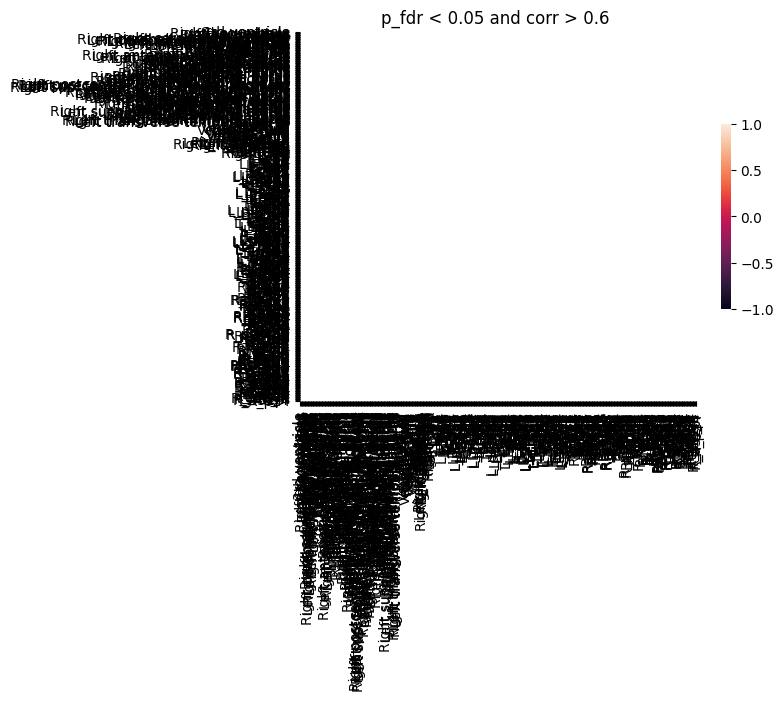

AttributeError: 'Index' object has no attribute 'index'

In [41]:
reload(lbr)
PLA_W00_zscore = PLA_W00.apply(zscore, axis=1)
DEF_W00_zscore = DEF_W00.apply(zscore, axis=1)
PLA_W36_zscore = PLA_W36.apply(zscore, axis=1)
DEF_W36_zscore = DEF_W36.apply(zscore, axis=1)

__=lbr.compare_matrix(PLA_W36_zscore,DEF_W36_zscore,"PLA_W36","DEF_W36",10000,PLA_W36.columns,os.path.join(STUDY_PATH,"screenshots"))
__=lbr.compare_matrix(DEF_W00_zscore,DEF_W36_zscore,"DEF_W00","DEF_W36",10000,PLA_W36.columns.index,os.path.join(STUDY_PATH,"screenshots"))
__=lbr.compare_matrix(PLA_W00_zscore,PLA_W36_zscore,"PLA_W00","PLA_W36",10000,PLA_W36.columns.index,os.path.join(STUDY_PATH,"screenshots"))
__=lbr.compare_matrix(PLA_W00_zscore,DEF_W00_zscore,"PLA_W00","DEF_W00",10000,PLA_W00.columns,os.path.join(STUDY_PATH,"screenshots"))

La bibil à RORO loaded
Euclidean distance between PLA_W36 and DEF_W36 is 3.269
Sur 10000 seulement 4878 ont une distance superieure,les deux matrices sont donc significativement différentes à p=0.4878
Indices des 5% de nodes ayant valeurs les plus hautes : [38  3] et Index(['Right supramarginal gyrus', 'Right amygdala'], dtype='object')
54 nodes, 1431 connexions, 0 significantly different for p_fdr < 0.05
et 0 avec des correlations >0.6 dans une des deux matrices


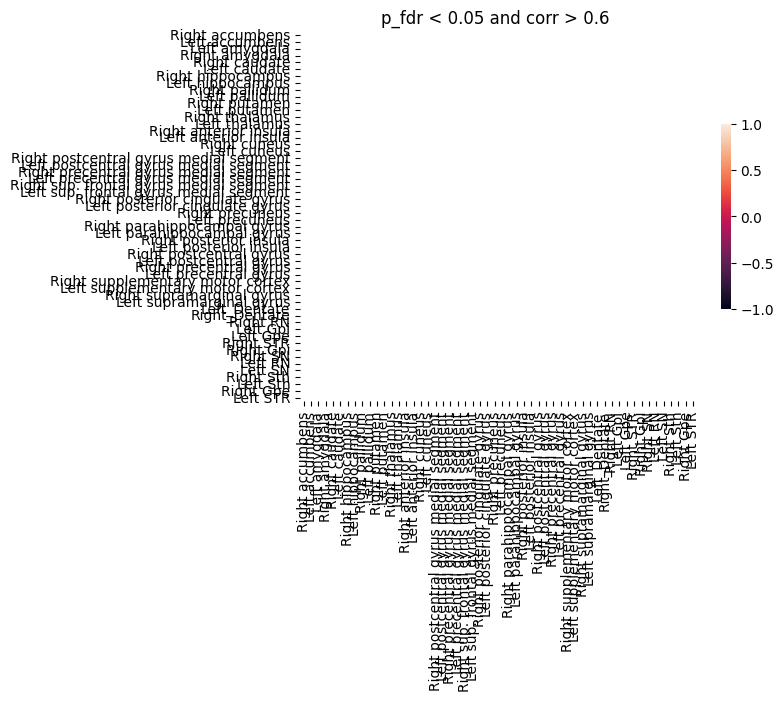

Euclidean distance between DEF_W00 and DEF_W36 is 2.363
Sur 10000 seulement 5137 ont une distance superieure,les deux matrices sont donc significativement différentes à p=0.5137
Indices des 5% de nodes ayant valeurs les plus hautes : [41 38] et Index(['Right_Dentate', 'Right supramarginal gyrus'], dtype='object', name='Name_inFP2')
54 nodes, 1431 connexions, 0 significantly different for p_fdr < 0.05
et 0 avec des correlations >0.6 dans une des deux matrices


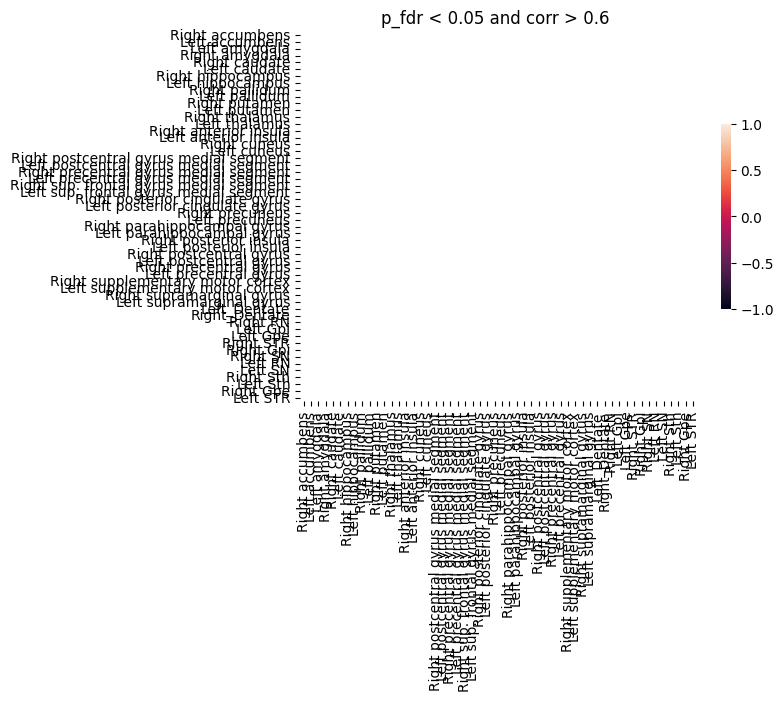

Euclidean distance between PLA_W00 and PLA_W36 is 3.216
Sur 10000 seulement 4654 ont une distance superieure,les deux matrices sont donc significativement différentes à p=0.4654
Indices des 5% de nodes ayant valeurs les plus hautes : [17 26] et Index(['Left cuneus', 'Right precuneus'], dtype='object', name='Name_inFP2')
54 nodes, 1431 connexions, 0 significantly different for p_fdr < 0.05
et 0 avec des correlations >0.6 dans une des deux matrices


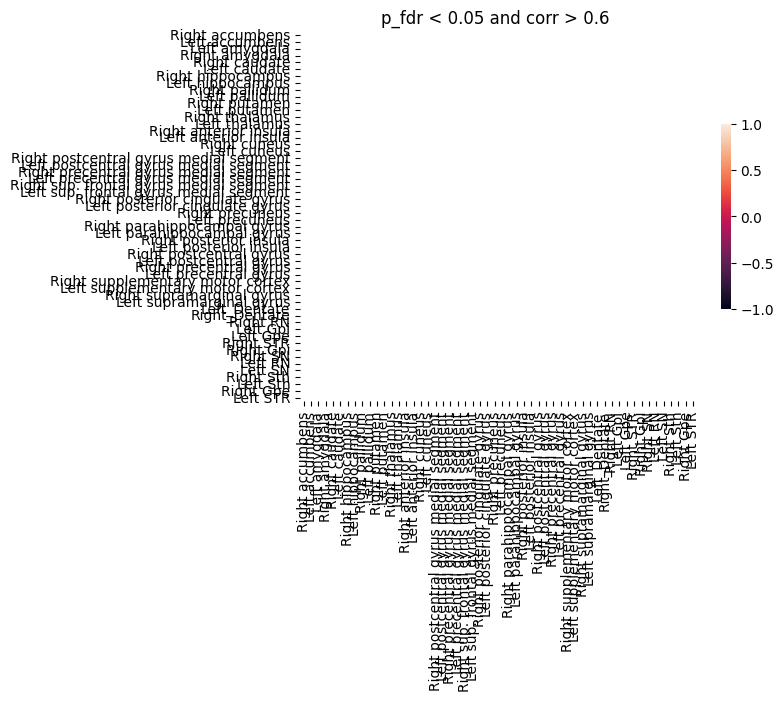

Euclidean distance between PLA_W00 and DEF_W00 is 2.229
Sur 10000 seulement 6547 ont une distance superieure,les deux matrices sont donc significativement différentes à p=0.6547
Indices des 5% de nodes ayant valeurs les plus hautes : [38 39] et Index(['Right supramarginal gyrus', 'Left supramarginal gyrus'], dtype='object', name='Name_inFP2')
54 nodes, 1431 connexions, 0 significantly different for p_fdr < 0.05
et 0 avec des correlations >0.6 dans une des deux matrices


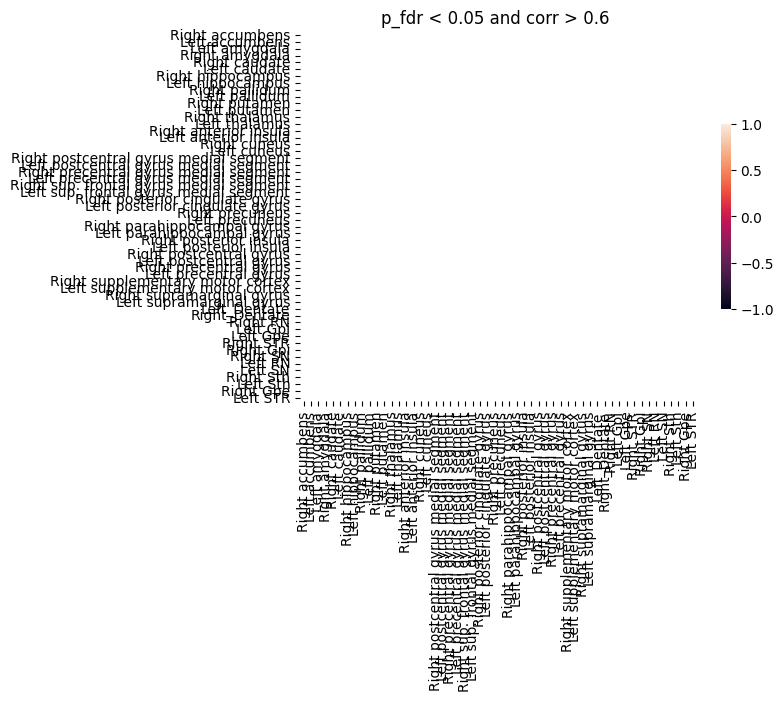

In [58]:
reload(lbr)

col2keep=df_roi['RoroChoice']==1
__=lbr.compare_matrix(PLA_W36.loc[:,col2keep],DEF_W36.loc[:,col2keep],"PLA_W36","DEF_W36",10000,PLA_W36.loc[:,col2keep].columns,os.path.join(STUDY_PATH,"screenshots"))
__=lbr.compare_matrix(DEF_W00.loc[:,col2keep],DEF_W36.loc[:,col2keep],"DEF_W00","DEF_W36",10000,col2keep[col2keep].index,os.path.join(STUDY_PATH,"screenshots"))
__=lbr.compare_matrix(PLA_W00.loc[:,col2keep],PLA_W36.loc[:,col2keep],"PLA_W00","PLA_W36",10000,col2keep[col2keep].index,os.path.join(STUDY_PATH,"screenshots"))
__=lbr.compare_matrix(PLA_W00.loc[:,col2keep],DEF_W00.loc[:,col2keep],"PLA_W00","DEF_W00",10000,col2keep[col2keep].index,os.path.join(STUDY_PATH,"screenshots"))

Index(['3rd ventricle', '4th ventricle', 'Right accumbens', 'Left accumbens',
       'Left amygdala', 'Right amygdala', 'Brainstem', 'Right caudate',
       'Left caudate', 'Right cerebellum exterior',
       ...
       'Left Gpe', 'Right STR', 'Right Gpi', 'Right SN', 'Left RN', 'Left SN',
       'Right Sth', 'Left Sth', 'Right Gpe', 'Left STR'],
      dtype='object', length=178)